<a href="https://colab.research.google.com/github/aditi-govindu/Image-Classsification-using-sklearn/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preprocessing of data** using os module

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
flat_data = []
images = []
DataDirectory = '/content/drive/MyDrive/Images'
# Images to be classified as:
Categories = ['Burger','Pizza','Momo']

for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  # Encode categories Burger as 0, Pizza as 1 and Momo as 2
  target_class = Categories.index(i)
  # Create data path for all folders under MinorProject
  path = os.path.join(DataDirectory,i)
  # Image resizing, to ensure all images are of same dimensions
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # Skimage normalizes the value of image
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(target_class)
# Convert list to numpy array format
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

Category is: Burger 	Label encoded as: 0
Category is: Pizza 	Label encoded as: 1
Category is: Momo 	Label encoded as: 2


**Dataframe creation** using pandas library

In [38]:
# Create dataframe using pandas
df = pd.DataFrame(flat_data)
# Create a column for output data called Target
df['Target'] = target
# Rows are all the input images (90 images, 30 of each category)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.945098,0.905843,0.850196,0.968627,0.949020,0.895294,0.941176,0.874510,0.764902,0.934392,0.868902,0.756353,0.944706,0.866275,0.740784,0.898431,0.792196,0.620392,0.929412,0.847059,0.711255,0.921569,0.816275,0.651961,0.904706,0.791255,0.597255,0.889843,0.756863,0.541176,0.897255,0.774902,0.569804,0.916863,0.839216,0.705373,0.889020,0.775294,0.593725,0.839608,...,0.734118,0.690588,0.613137,0.440667,0.368627,0.285608,0.479647,0.413333,0.335294,0.243569,0.208235,0.157647,0.130471,0.086000,0.054627,0.121569,0.078431,0.058431,0.121569,0.078431,0.058824,0.114118,0.070980,0.051412,0.118431,0.075294,0.059216,0.121961,0.079216,0.051373,0.137451,0.090588,0.055294,0.145098,0.094510,0.072039,0.141176,0.098039,0.081961,0
1,0.427451,0.385294,0.364706,0.355882,0.305882,0.270588,0.534314,0.449020,0.406863,0.680392,0.574510,0.515686,0.689216,0.609804,0.576471,0.478431,0.437255,0.444118,0.382353,0.361765,0.375490,0.409804,0.374510,0.387255,0.640196,0.539216,0.489216,0.717647,0.592157,0.505882,0.676471,0.588235,0.545098,0.679412,0.611765,0.585294,0.714706,0.650980,0.623529,0.735294,...,0.770588,0.619608,0.499020,0.738235,0.602941,0.498039,0.736275,0.618627,0.536275,0.758824,0.641176,0.562745,0.698039,0.614706,0.575490,0.676471,0.613725,0.609804,0.705882,0.676471,0.707843,0.571569,0.533333,0.557843,0.566667,0.523529,0.554902,0.572549,0.512745,0.533333,0.554902,0.462745,0.453922,0.603922,0.498039,0.486275,0.554902,0.449020,0.429412,0
2,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0
3,0.803922,0.807843,0.815686,0.803922,0.807843,0.815686,0.803922,0.807843,0.815686,0.807843,0.811765,0.819608,0.807843,0.811765,0.819608,0.803922,0.815686,0.815686,0.806645,0.819608,0.815686,0.803922,0.819608,0.815686,0.807843,0.823529,0.820153,0.815686,0.827451,0.827451,0.819608,0.823529,0.831373,0.822985,0.826906,0.834749,0.823529,0.827451,0.835294,0.829085,...,0.866013,0.893464,0.924837,0.858824,0.878431,0.913725,0.858824,0.878431,0.917647,0.859477,0.878431,0.918192,0.862745,0.878431,0.921569,0.860458,0.881699,0.921569,0.847059,0.877233,0.913617,0.850871,0.869935,0.909150,0.862745,0.874510,0.915359,0.870588,0.882353,0.921569,0.878431,0.890196,0.925490,0.886275,0.900000,0.935294,0.894118,0.905882,0.941176,0
4,0.219608,0.145098,0.083181,0.227451,0.152941,0.094118,0.235085,0.160575,0.101926,0.231373,0.160784,0.105882,0.235294,0.164706,0.109804,0.235913,0.165325,0.110423,0.234641,0.164052,0.109150,0.231373,0.160784,0.105882,0.224148,0.153560,0.098039,0.215686,0.148401,0.082353,0.207843,0.141176,0.082353,0.207843,0.137255,0.086275,0.207843,0.137255,0.086275,0.207843,...,0.086275,0.109804,0.149020,0.098039,0.113725,0.156863,0.098039,0.113725,0.156863,0.097830,0.109804,0.152941,0.094118,0.109804,0.152941,0.094118,0.109595,0.152941,0.094118,0.109804,0.152941,0.094118,0.109804,0.156863,0.098039,0.113725,0.160784,0.101926,0.117612,0.164671,0.110423,0.125490,0.176915,0.117647,0.133229,0.184209,0.121569,0.137220,0.191948,0
...,...,...,...,...,...,...,...,...,...,...,...,.

AxesImage(54,36;334.8x217.44)


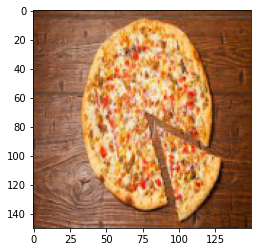

In [39]:
# Display 1 resized image 
print(plt.imshow(images[49]))

**Test and train dataset** creation using sklearn library functions
1.   Data is first split into input and output
2.   Input and Output are further split into testing and training data, individually



In [40]:
# Split data into input and output sets
from sklearn.model_selection import train_test_split

# x is all input values of images and their pixel values (90 images * 67500)
# y is output values or correct label of image (90 images * 1 column of labels)

x = df.iloc[:,:-1].values
y = target
print("Input data dimensions:",x.shape)
print("Output data dimensions:",y.shape)

# Stratify ensures every image is divided in equal proportions (no bias)
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,test_size = 0.2,random_state=0,stratify=y)
print("Dimensions of input training data:",x_train.shape)
print("Dimensions of input testing data:",x_test.shape)
print("Dimensions of output training data:",y_train.shape)
print("Dimensions of output testing data:",y_test.shape)

Input data dimensions: (90, 67500)
Output data dimensions: (90,)
Dimensions of input training data: (72, 67500)
Dimensions of input testing data: (18, 67500)
Dimensions of output training data: (72,)
Dimensions of output testing data: (18,)


In [41]:
# Check if testing and training data are divided in equal proportions
print("Labels\t\t   Image index considered")
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

Labels		   Image index considered
(array([0, 1, 2]), array([24, 24, 24]))
(array([0, 1, 2]), array([6, 6, 6]))


**Classification** using SVM

In [42]:
# Applying Support Vector Machine classifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000]}]
                    
# Apply GridSearchCV to find best parameters for given dataset
# verbose is used to describe the steps taken to find best parameters
cv = GridSearchCV(SVC(), tuned_parameters, refit = True,verbose= 3) 
cv.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.200, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.400, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.286, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.286, total=   0.5s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.286, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.467, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.467, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.429, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.071, total=   0.5s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
# Display parameters selected by GridSearchCV for SVM 3 classes
# Parameters obtained: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
print("Best parameters to apply are:",cv.best_params_)
# Display model after hyperparameter tuning
svm = cv.best_estimator_
print("Model after tuning is:\n",svm)

Best parameters to apply are: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Model after tuning is:
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [44]:
# Predict the output of model after above parameters are applied to it
y_prediction = svm.predict(x_test)

In [45]:
# Print expected and predicted output
print("Expected results: ",y_test)
print("Predicted results:",y_prediction)

Expected results:  [1 1 0 0 2 1 2 0 1 2 2 0 2 1 0 2 1 0]
Predicted results: [1 2 0 0 1 1 2 0 1 2 2 0 0 2 0 2 0 0]


**Evaluation of model**


1.   **Precision** measures how many positives were actually positive (Positive predictive ability)
2.   **Recall** measures how many positives were correctly predicted (True positive rate)
3.   **Confusion matri**x is a square matrix where rows are true (expected labels) and columns are predicted labels
4.   **Accuracy** measures correctly classified data vs total data

In [46]:
# Evaluate the model using confusion matrix, classification report and accuracy

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print("Confusion matrix results:\n",confusion_matrix(y_prediction,y_test))
print("\nClassification report of model:\n",classification_report(y_prediction,y_test))
print("Accuracy score:",100*accuracy_score(y_prediction,y_test))

Confusion matrix results:
 [[6 1 1]
 [0 3 1]
 [0 2 4]]

Classification report of model:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      0.75      0.60         4
           2       0.67      0.67      0.67         6

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.71        18
weighted avg       0.78      0.72      0.74        18

Accuracy score: 72.22222222222221
